**Enter your Names:**  William Yao, William Phan, Emilio Rivera, Ari Anugu

---


    
**Enter your PIDs:**  syao2017, wphan21, emilio532, anugu2
    

# Project 1: Covid Tracker

#### Description: 
We are planning to find different correlations between COVID-19 vaccinations and the spread of the virus in the United States. While conducting such an analysis, we will also consider how different demographic groups are affected based on vaccination rates, political leanings, and other factors.
 
#### Questions: 
Does higher vaccination rates in different states lead to a reduction in the cases and deaths from COVID-19? How are different demographic groups (race, ethnicity, age, sex, etc.) affected by the virus when vaccinated or unvaccinated? If so, why are specific states more likely to have a faster spread of the virus? Could the political leanings in these various states lead to a greater spread of the disease?

#### Potential Data Points: 
High density areas, hispitalizations, demographics, rate of vaccinations, political demographic
https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm
https://www.cdc.gov/coronavirus/2019-ncov/science/forecasting/mathematical-modeling-outbreak.html
https://covid.cdc.gov/covid-data-tracker/#trends_dailycases

<i>Vaccination data</i>: 
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

<i>Cases and Death data</i>:
https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

Possible questions:
    which state is most likely to get covid?
    Where will covid most likely appear next?
    which state best handled covid?

In [89]:
#Libraries
import requests, pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

cCasesAndDeaths = pandas.read_csv('cumalitiveCasesAndDeaths.csv')
DCasesAndDeaths = pandas.read_csv('dailyCasesAndDeaths.csv')
vaccinations = pandas.read_csv('vaccinesDelivered.csv')

#Date generated: Tue Apr 05 2022 14:55:59 GMT-0400 (Eastern Daylight Time) for all tables



In [90]:
cCasesAndDeaths

,Location,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population",COVID-19 Fatality Rate,Footnotes
0,United States,"78,798,989",NaN,"944,830",NaN,0.012,1.0
1,Alabama,"1,276,580",NaN,"18,102",NaN,0.014,NaN
2,Alaska,"237,754",NaN,"1,163",NaN,0.005,NaN
3,Arizona,"1,973,479",NaN,"27,876",NaN,0.014,NaN
4,Arkansas,"817,798",NaN,"10,381",NaN,0.013,NaN
...,...,...,...,...,...,...,...
60,"Johns Hopkins University, [COVID-19 Dashboard ...",NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2020 Population data from Annual Population Es...,NaN,NaN,NaN,NaN,NaN,NaN
63,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
DCasesAndDeaths

,Location,Daily Change in Cumulative Cases,Daily Cases (7-Day Rolling Average),Daily Cases Per Million Population,Percent Change in Cases Over 14 Days,Daily Change in Cumulative Deaths,Daily Deaths (7-Day Rolling Average),Daily Deaths Per Million Population,Percent Change in Deaths Over 14 Days
0,United States,"65,491","74,750",227.0,-0.646,"2,941","1,742",5.0,-0.325
1,Alabama,"1,225",938,191.0,-0.761,95,45,9.0,0.098
2,Alaska,0,421,575.0,-0.679,0,3,4.0,0.048
3,Arizona,"1,801","1,945",262.0,-0.635,86,68,9.0,0.122
4,Arkansas,571,876,289.0,-0.488,40,21,7.0,-0.284
...,...,...,...,...,...,...,...,...,...
60,"As of July 2021, many states report their COVI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,"Johns Hopkins University, [COVID-19 Dashboard ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
vaccinations

,Location,Total COVID-19 Vaccines Delivered,Total COVID-19 Vaccines Administered,Share of Delivered Vaccines That Have Been Administered,Number of People Who Have Been Vaccinated with At Least One Dose,Share of Population Vaccinated with At Least One Dose,Number of People Who Have Been Fully Vaccinated,Share of Population Fully Vaccinated
0,United States,"688,186,745","551,855,907",0.80200,"253,307,984",0.763,"215,253,201",0.648
1,Alabama,"9,229,440","6,087,103",0.66000,"3,031,464",0.618,"2,459,363",0.502
2,Alaska,"1,436,865","1,093,808",0.76100,"500,864",0.685,"445,530",0.609
3,Arizona,"14,019,320","11,508,661",0.82100,"5,191,587",0.713,"4,364,444",0.600
4,Arkansas,"5,845,920","4,081,816",0.69800,"1,981,905",0.657,"1,612,690",0.534
5,California,"85,679,525","71,306,336",0.83200,"32,284,670",0.817,"27,773,615",0.703
6,Colorado,"11,822,075","10,299,034",0.87100,"4,507,596",0.783,"3,980,992",0.691
7,Connecticut,"8,282,535","7,277,732",0.87900,"3,345,245",0.938,"2,771,081",0.777
8,Delaware,"2,215,155","1,729,273",0.78100,"794,932",0.816,"656,886",0.675
9,District of Columbia,"1,771,405","1,412,520",0.79700,"670,350",0.950,"503,427",0.713


# Data Cleaning

<i>**Goal**</i>: 
* We will clean up any data that will be used in our analysis

<i>What will we change?</i>
* Replace extreme values
* Make sure all data units are correct 
* Make sure all values in the table have the correct data types.
* Replace NaN values with a value that better suits the data
* Get rid of any messy text such as punctionation, whitespace, etc.

In [93]:
#merge all the data together
merged = cCasesAndDeaths.merge(DCasesAndDeaths, how = 'inner', on = ['Location'])
merged = merged.merge(vaccinations, how = 'inner', on = ['Location'])
merged.dropna(axis = 1)

,Location,Number of COVID-19 Cases,Deaths from COVID-19,COVID-19 Fatality Rate,Daily Change in Cumulative Cases,Daily Cases (7-Day Rolling Average),Percent Change in Cases Over 14 Days,Daily Change in Cumulative Deaths,Daily Deaths (7-Day Rolling Average),Total COVID-19 Vaccines Delivered,Total COVID-19 Vaccines Administered,Share of Delivered Vaccines That Have Been Administered,Number of People Who Have Been Vaccinated with At Least One Dose,Share of Population Vaccinated with At Least One Dose,Number of People Who Have Been Fully Vaccinated,Share of Population Fully Vaccinated
0,United States,"78,798,989","944,830",0.012,"65,491","74,750",-0.646,"2,941","1,742","688,186,745","551,855,907",0.80200,"253,307,984",0.763,"215,253,201",0.648
1,Alabama,"1,276,580","18,102",0.014,"1,225",938,-0.761,95,45,"9,229,440","6,087,103",0.66000,"3,031,464",0.618,"2,459,363",0.502
2,Alaska,"237,754","1,163",0.005,0,421,-0.679,0,3,"1,436,865","1,093,808",0.76100,"500,864",0.685,"445,530",0.609
3,Arizona,"1,973,479","27,876",0.014,"1,801","1,945",-0.635,86,68,"14,019,320","11,508,661",0.82100,"5,191,587",0.713,"4,364,444",0.600
4,Arkansas,"817,798","10,381",0.013,571,876,-0.488,40,21,"5,845,920","4,081,816",0.69800,"1,981,905",0.657,"1,612,690",0.534
5,California,"8,946,146","84,728",0.009,"14,179","9,527",-0.698,260,163,"85,679,525","71,306,336",0.83200,"32,284,670",0.817,"27,773,615",0.703
6,Colorado,"1,309,778","11,750",0.009,"1,427","1,473",-0.472,21,11,"11,822,075","10,299,034",0.87100,"4,507,596",0.783,"3,980,992",0.691
7,Connecticut,"721,954","10,443",0.014,458,556,-0.430,5,17,"8,282,535","7,277,732",0.87900,"3,345,245",0.938,"2,771,081",0.777
8,Delaware,"256,207","2,703",0.011,822,252,-0.381,0,7,"2,215,155","1,729,273",0.78100,"794,932",0.816,"656,886",0.675
9,District of Columbia,"134,214","1,317",0.010,100,90,-0.608,0,1,"1,771,405","1,412,520",0.79700,"670,350",0.950,"503,427",0.713


In [94]:
#grab specific columns we want to examine

data = merged[['Location', 'Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']]
df = data.copy()


#Remove commas and make data type to an int for various columns
df['Number of COVID-19 Cases'] = data['Number of COVID-19 Cases'].map(lambda s: int(s.replace(',', '')))
df['Deaths from COVID-19'] = data['Deaths from COVID-19'].map(lambda s: int(s.replace(',', '')))
df['Total COVID-19 Vaccines Administered'] = data['Total COVID-19 Vaccines Administered'].map(lambda s: int(s.replace(',', '')))
df['Daily Change in Cumulative Deaths'] = data['Daily Change in Cumulative Deaths'].map(lambda s: int(s.replace(',', '')))


df

,Location,Number of COVID-19 Cases,Deaths from COVID-19,Total COVID-19 Vaccines Administered,Daily Change in Cumulative Deaths
0,United States,78798989,944830,551855907,2941
1,Alabama,1276580,18102,6087103,95
2,Alaska,237754,1163,1093808,0
3,Arizona,1973479,27876,11508661,86
4,Arkansas,817798,10381,4081816,40
5,California,8946146,84728,71306336,260
6,Colorado,1309778,11750,10299034,21
7,Connecticut,721954,10443,7277732,5
8,Delaware,256207,2703,1729273,0
9,District of Columbia,134214,1317,1412520,0


# Visualization

* We will make a line graph that shows the cases and deaths overtime
* Line graph showing vaccination rate overtime
* Another line graph showing the trends of the number of cases, deaths, and vaccinations. Such graph will help us to observe any useful patterns between vaccinations and COVID-19 spread.
* We will also make use of scatter plots and bargraphs in order to find more useful patterns in our analysis.

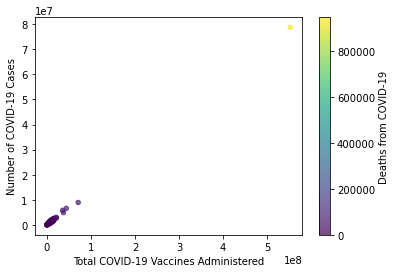

In [95]:
ax = df.plot.scatter('Total COVID-19 Vaccines Administered', 'Number of COVID-19 Cases',c = 'Deaths from COVID-19', colormap=plt.cm.viridis, sharex = False, alpha = 0.7)

<AxesSubplot:xlabel='Location'>

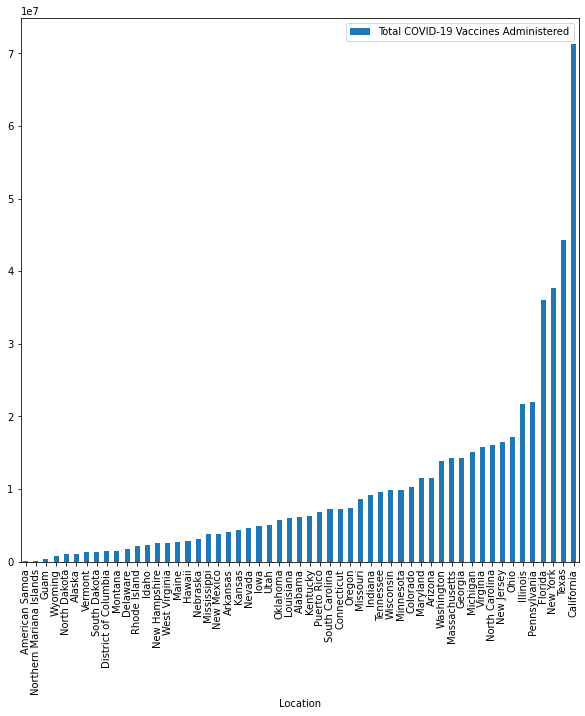

In [106]:

#Create a bar graph that show the relationship between 
#the vaccines administed in each state

df2 = df.copy()
df2.drop(0, inplace=True)
df2.sort_values('Total COVID-19 Vaccines Administered').plot.bar('Location', 'Total COVID-19 Vaccines Administered', figsize=(10,10))

<AxesSubplot:xlabel='Location'>

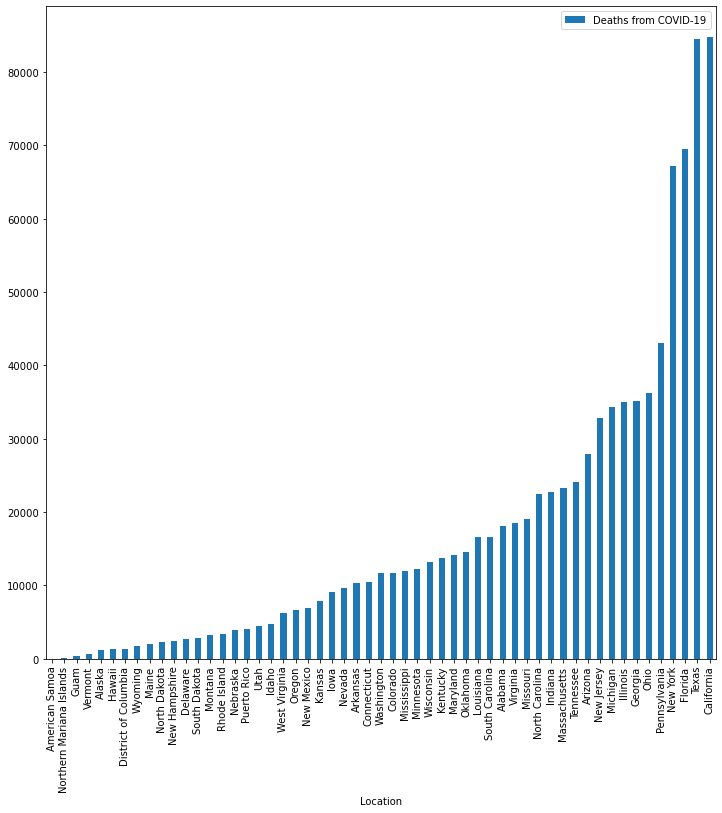

In [102]:
#Create a bar graph that show the relationship between 
#the deaths in each state
df2.sort_values('Deaths from COVID-19').plot.bar('Location', 'Deaths from COVID-19', figsize=(12,12))

<AxesSubplot:xlabel='Location'>

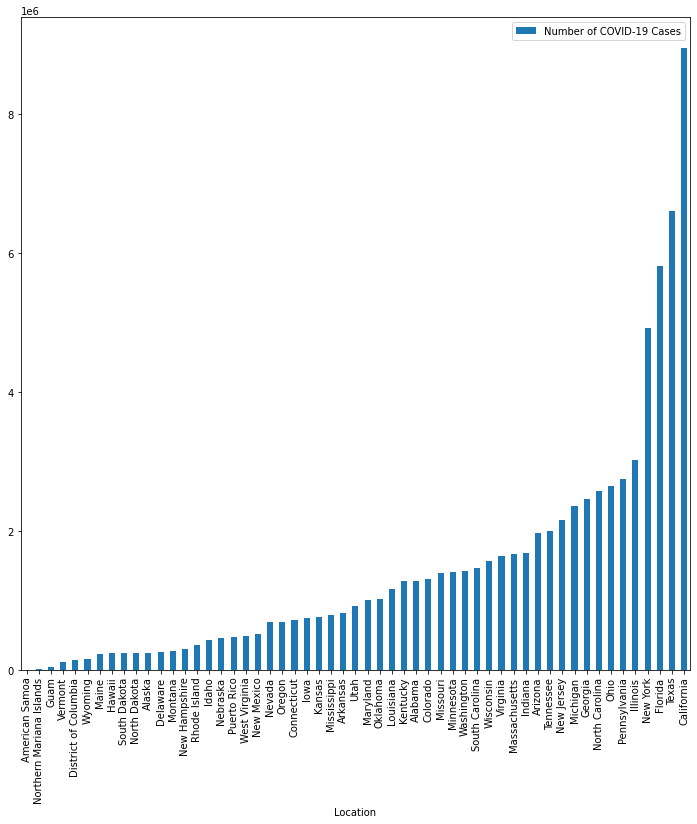

In [108]:
#Create a bar graph that show the relationship between 
#the number of cases in each state
df2.sort_values('Number of COVID-19 Cases').plot.bar('Location', 'Number of COVID-19 Cases', figsize=(12,12))

# Analyze Data
* We may be able to use linear regression to model see different correlations between variables.

# Report
